<a href="https://colab.research.google.com/github/jan3011/Prediction-of-Parkinson-disease/blob/master/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

           Feature        Score
4             U1RS  2247.508359
5            U1RSM  1352.264701
3        HoehnYahr   164.838710
9           Target    73.000000
1  Height (meters)    47.424231
6             TUAG    28.504249
8         Speed_10     5.828629
[6.24216664e-04 2.01543298e-04 2.97014751e-04 2.66658325e-01
 1.67063239e-01 5.61516944e-02 9.15200354e-03 1.24922800e-02
 8.34162010e-02 4.03943482e-01]


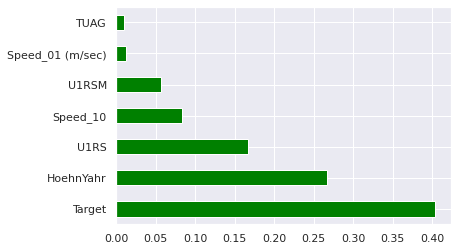

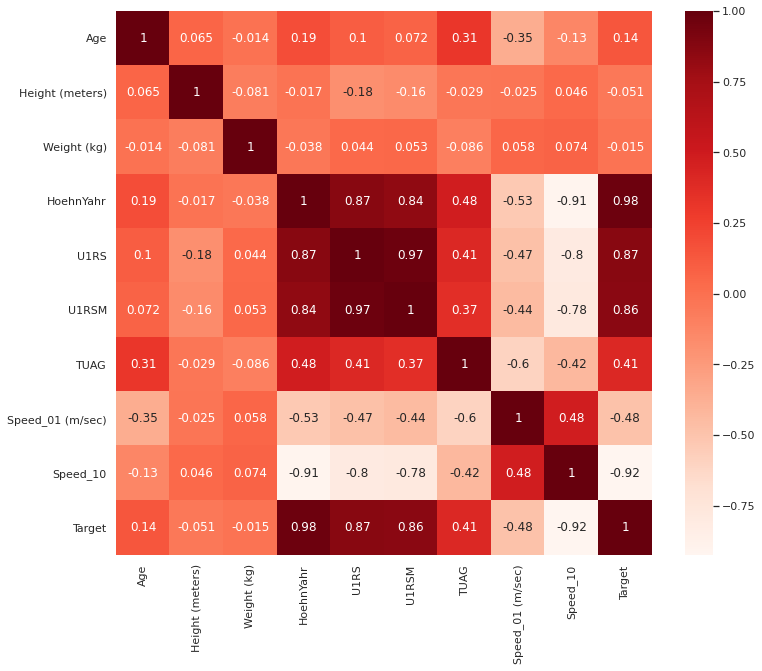

HoehnYahr    0.975055
U1RS         0.871941
U1RSM        0.857827
Speed_10     0.923113
Target       1.000000
Name: Target, dtype: float64

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
sns.set()
from google.colab import files
d=files.upload() #upload the csv to google colab

df=pd.read_csv('demographics.csv')
df.head()
df['HoehnYahr'].fillna(df.groupby('Target')['HoehnYahr'].transform("median"),inplace=True)
df['U1RS'].fillna(df.groupby('Target')['U1RS'].transform("median"),inplace=True)
df['Speed_10'].fillna(df.groupby('Target')['Speed_10'].transform("median"),inplace=True)
df['U1RSM'].fillna(df.groupby('Target')['U1RSM'].transform("median"),inplace=True)
df['TUAG'].fillna(df.groupby('Target')['TUAG'].transform("median"),inplace=True)
df['Height (meters)'].fillna(df.groupby('Target')['Height (meters)'].transform("median"),inplace=True)
df['Weight (kg)'].fillna(df.groupby('Target')['Weight (kg)'].transform("median"),inplace=True)
df['Speed_01 (m/sec)'].fillna(df.groupby('Target')['Speed_01 (m/sec)'].transform("median"),inplace=True)

X=df.iloc[:,4:14]
y=df.iloc[:,13]
Y=y.astype(int)

#Univariate Selection using chisquare
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))

#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh',cmap='ocean')
plt.show()

#Filter Method
from matplotlib import figure
plt.figure(figsize=(12,10))
cor=X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
cor_target = abs(cor["Target"])
relevant_features = cor_target[cor_target>0.5]
relevant_features